In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential 
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from skimage.transform import resize
import h5py
import os


In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Resize images to 42x42
x_train_resized = np.zeros((x_train.shape[0], 42, 42))
for i in range(x_train.shape[0]):
    x_train_resized[i] = resize(x_train[i], (42, 42))

x_test_resized = np.zeros((x_test.shape[0], 42, 42))
for i in range(x_test.shape[0]):
    x_test_resized[i] = resize(x_test[i], (42, 42))

# Reshape to add channel dimension (required for Keras)
x_train_resized = x_train_resized.reshape(-1, 42, 42, 1)
x_test_resized = x_test_resized.reshape(-1, 42, 42, 1)

# Normalize pixel values to range [0, 1]
x_train_resized = x_train_resized.astype('float32') / 255.0
x_test_resized = x_test_resized.astype('float32') / 255.0
print(x_test_resized[0].shape)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


(42, 42, 1)


# Code for the Accuracy of Floating point for the whole test dataset

In [15]:
import matplotlib.pyplot as plt

total_correct = 0
total_errors = 0
model = load_model('model_weights.h5')
weights_and_biases = np.loadtxt("model_weights.txt")

weights_shape = (3, 3, 1, 4)  # Assuming kernel size of (3, 3) and 4 filters
weights2_shape = (3, 3, 4, 4)
weights3_shape = (324, 10)

weights = weights_and_biases[0:36].reshape(weights_shape)  # weights
biases = weights_and_biases[36:40]  # biases

weights2 = weights_and_biases[40:184].reshape(weights2_shape)
biases2 = weights_and_biases[184:188]

weights3 = weights_and_biases[188:3428].reshape(weights3_shape)
biases3 = weights_and_biases[3428:3438]

#Model Below
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=(42, 42, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))

model.layers[0].set_weights([weights, biases])
model.layers[2].set_weights([weights2, biases2])
model.layers[5].set_weights([weights3, biases3])

for val in range(len(x_test_resized)):
  img_array = x_test_resized[val].flatten()

  img_array *= 100    # for binary conversion: ask prof

  np.savetxt("mnist_image_1.txt", img_array , fmt='%.6f', newline='\n' )


  img_array = np.loadtxt('mnist_image_1.txt')
  img_array = img_array.reshape((1, 42, 42, 1))  # Reshape to (batch_size, height, width, channels)

  conv1_output = model.predict(img_array)

  # Save the convolutional layer output
  # print("Output shape of the Dense layer:", conv1_output.shape)

  # Save the dense layer output
  with open('Python_prog_out_Dense.txt', 'w') as file:
      file.write("Channel 1: \n")
      for i in range(conv1_output.shape[1]):
          file.write("%0.2f\n" % (conv1_output[0, i]))

  # print("Dense layer output saved")


  #################################################################
  output_values = []

  # Read the file
  with open('Python_prog_out_Dense.txt', 'r') as file:
      lines = file.readlines()
      for line in lines[1:]:
          output_values.append(float(line.strip()))  

  predicted_class = np.argmax(output_values)

  actual_class = np.argmax(y_test[val])

  if predicted_class == actual_class:
    total_correct += 1
  else:
    total_errors += 1

print(f"Total Correct Predictions: {total_correct}")
print(f"Total Errors: {total_errors}")

print(f"Accuracy = {(total_correct/(total_correct+total_errors))*100}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


c:\Users\Rishit Thakkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

#### Accuracy without img_array *= 100 : 93%
#### Accuracy with img_array *= 100 : 80%

# Takes in all the test set, converts into binary and saves all as arrays in a text file

In [4]:
import numpy as np

def write_arrays_to_text(data_filename, output_filename, image_index):
    with open(data_filename, "r") as data_file, open(output_filename, "a") as output_file:
        image_data = data_file.read().strip()  # Read and strip extra newlines
        output_file.write(f"int8_t image_{image_index+1} [] = {{{{{image_data}}}}};\n")

def converter(num):
    int_part = int(num)
    frac_part = abs(num - int_part)

    if num < 0:
        binary_string = "1"
        num += 8  
    else:
        binary_string = "0"

    for power in [4, 2, 1]:
        if num >= power:
            binary_string += "1"
            num -= power
        else:
            binary_string += "0"

    for place_value in [0.5, 0.25, 0.125, 0.0625]:
        if frac_part >= place_value:
            binary_string += "1"
            frac_part -= place_value
        else:
            binary_string += "0"

    return "0b" + binary_string

def convert_from_file(filename, output_filename):
    with open(filename, "r") as input_file, open(output_filename, "w") as output_file:
        for line in input_file:
            num = float(line.strip())
            binary_string = converter(num)
            output_file.write(binary_string + "\n")

# File to store class labels
labels_filename = "mnist_labels.txt"
with open(labels_filename, 'w') as labels_file:
    for val in range(len(x_test_resized)):
        img_array = x_test_resized[val].flatten()
        img_array *= 100  # Assuming scaling is required before conversion

        np.savetxt("mnist_image_1.txt", img_array, fmt='%.6f', newline='\n')

        filename = "mnist_image_1.txt"
        output_filename = "binary_" + filename
        convert_from_file(filename, output_filename)

        # Read binary output, format as comma-separated string
        with open(output_filename, 'r') as file:
            lines = file.readlines()
        array_str = ','.join(line.strip() for line in lines)

        # Write formatted binary data to a temporary file
        temp_data_filename = "temp_binary_mnist_image_1.txt"
        with open(temp_data_filename, 'w') as file:
            file.write(array_str)

        # Append formatted data to the main output file
        write_arrays_to_text(temp_data_filename, "image_data.txt", val)

        # Write the class label to the labels file
        class_label = np.argmax(y_test[val])  # Assuming y_test is one-hot encoded
        labels_file.write(f"{class_label}\n")


In [1]:
def generate_images_array_content(num_images=10000):
    # Generate the content inside the curly braces
    images_list = ', '.join(f'image_{i}' for i in range(1, num_images + 1))
    # Form the complete line to write to the file
    content = f"int8_t* images[{num_images}] = {{{images_list}}};"
    return content

def write_to_file(filename, content):
    # Write the content to the specified file
    with open(filename, 'w') as file:
        file.write(content)

def main():
    filename = "output.c"  # Set the filename
    content = generate_images_array_content()  # Generate the array content
    write_to_file(filename, content)  # Write the content to the file
    print(f"Content written to {filename} successfully.")

if __name__ == "__main__":
    main()


Content written to output.c successfully.


# Testing with individual Images from the test set

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


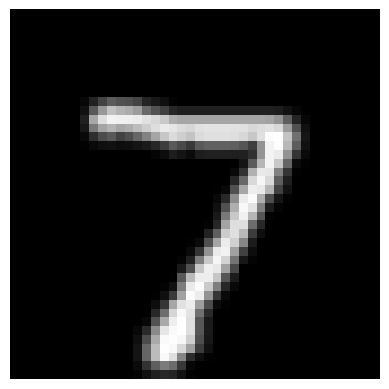

In [11]:
import matplotlib.pyplot as plt
val = 0
img_array = x_test_resized[val].flatten()

img_array *= 100    # for binary conversion: ask prof

print(y_test[val])
np.savetxt("mnist_image_1.txt", img_array , fmt='%.6f', newline='\n' )


img_array = x_test_resized[val].reshape(42, 42)

# Plot the image
plt.imshow(img_array, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()



In [82]:
def converter(num):

  int_part = int(num)
  frac_part = abs(num - int_part)

  if num < 0:
    binary_string = "1"
    num += 8  
  else:
    binary_string = "0"

  for power in [4, 2, 1]:
    if num >= power:
      binary_string += "1"
      num -= power
    else:
      binary_string += "0"

  for place_value in [0.5, 0.25, 0.125, 0.0625]:
    if frac_part >= place_value:
      binary_string += "1"
      frac_part -= place_value
    else:
      binary_string += "0"

  return "0b" + binary_string

def convert_from_file(filename, output_filename):
  with open(filename, "r") as input_file, open(output_filename, "w") as output_file:
    for line in input_file:
      num = float(line.strip())  
      binary_string = converter(num)
      output_file.write(binary_string + "\n")

filename = "mnist_image_1.txt"  
output_filename = "binary_" + filename
convert_from_file(filename, output_filename)

print(f"Converted data from {filename} to binary and saved in {output_filename}")

Converted data from mnist_image_1.txt to binary and saved in binary_mnist_image_1.txt


In [6]:
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.callbacks import ModelCheckpoint


model = load_model('model_weights.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.9181 - loss: 0.2984
Test Loss: 0.2572062909603119
Test Accuracy: 0.9316999912261963


In [7]:
weights_and_biases = np.loadtxt("model_weights.txt")

weights_shape = (3, 3, 1, 4)  # Assuming kernel size of (3, 3) and 4 filters
weights2_shape = (3, 3, 4, 4)
weights3_shape = (324, 10)

weights = weights_and_biases[0:36].reshape(weights_shape)  # weights
biases = weights_and_biases[36:40]  # biases

weights2 = weights_and_biases[40:184].reshape(weights2_shape)
biases2 = weights_and_biases[184:188]

weights3 = weights_and_biases[188:3428].reshape(weights3_shape)
biases3 = weights_and_biases[3428:3438]

#Model Below
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=(42, 42, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))

model.layers[0].set_weights([weights, biases])
model.layers[2].set_weights([weights2, biases2])
model.layers[5].set_weights([weights3, biases3])


img_array = np.loadtxt('mnist_image_1.txt')
img_array = img_array.reshape((1, 42, 42, 1))  # Reshape to (batch_size, height, width, channels)

conv1_output = model.predict(img_array)

# Save the convolutional layer output
print("Output shape of the Dense layer:", conv1_output.shape)

# Save the dense layer output
with open('Python_prog_out_Dense.txt', 'w') as file:
    file.write("Channel 1: \n")
    for i in range(conv1_output.shape[1]):
        file.write("%0.2f\n" % (conv1_output[0, i]))

print("Dense layer output saved")


#################################################################
output_values = []

# Read the file
with open('Python_prog_out_Dense.txt', 'r') as file:
    lines = file.readlines()
    for line in lines[1:]:
        output_values.append(float(line.strip()))  

predicted_class = np.argmax(output_values)

actual_class = np.argmax(y_test[val])

print(actual_class)

if predicted_class == actual_class:
  print(f"Prediction is Correct!  Predicted: {predicted_class}, Actual: {actual_class}")
else:
  print(f"Prediction is Incorrect. Predicted: {predicted_class}, Actual: {actual_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Output shape of the Dense layer: (1, 10)
Dense layer output saved
0
Prediction is Correct!  Predicted: 0, Actual: 0


c:\Users\Rishit Thakkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
